# CASE OVERVIEW
You are an assistant data analyst at a bank. Your manager told you that he has recently noticed an increase in churn for credit cards, and the board is very concerned. Please analyze customer data to study the potential cause and find out factors that may affect credit card customer churn. <br>

The purpose of this case study is not only to let help you understand basic data processing and analysis skills but also to provide an application of how data science is used in real-life business, that is, how to use these technologies to analyze customer churn. By completing this case, you should understand how data science can help banks understand customer behavior and prevent customer churn. <br>

Although this case does not involve complex machine learning technology, you can still understand the basic process of data analysis, including data cleaning, exploratory data analysis, data visualization, etc. These basic data processing and analysis techniques are the core skills in data science and are a good foundation for learning more advanced data analysis and machine learning techniques. <br>

Finally, I hope you can gain a deeper understanding of the application of big data technology in banking business from this case study. In the meanwhile, I hope you can improve your data processing and analysis capabilities.<br>

**Datasets**

There are two datasets:
1. "data_customer.xlsx": contains basic customer information, such as ID, age, gender, dependent count, education level, marital status, and income.

2. "data_credit_card.csv": contains the information on the customer's credit card behavior, such as ID, churn, credit card category, months on book, number of inactive months, number of contacts, credit limit, revolving credit, average open to buy, transaction amount, transaction counts, and average utilization ratio.

**Dataset modification**

1. The first dataset has more than 20,000 records, the second dataset has more than 30,000 records. The meraged dataset has more than 10,000 records;
2. The income of the first data set was changed to type "float", and the data is randomly generated from the original data distirbution; (for usage of "income category" in EDA).
3. The first data set adds a field called "assigned date" of a string type, (eg. 2022-02-17). It was randomly generated from June 2021 to December 2022.
4. In the first data set, data with duplicate IDs was added (4600 duplicate data are randomly generated). The "assigned date" field of the duplicate data was randomly generated as above. The income is randomly fluctuated by 20% on the original basis, and other fields are the same.
5. For the second data set, added null values;
6. For the second data set, added data with duplicate IDs (randomly generate 2600 pieces of duplicate data).
7. For the second data set, added the card activation date? (Training type conversion) What is the relationship between this variable and the total number of card opening months?
8. It was designed as two different data sets, the training dataset and the competition dataset. The two datasets have different field names, such as IDs, and data size (the training set can be reduced by several fields on this basis).

**Tasks**

You need to complete the case study within 3 hours. Complete the following tasks and your score will be calculated as the sum of the corresponding task scores. Note:
1. Follow the comments in the code to complete the task;
2. Hints are optional, but second and third-level hints will reduce the task's score.


## Part I, Data Import (est. 38 minutes, 75 pts)

**1. Set up environment**  (est. 3 minutes, 10 pts)

Complete two lines of code; est. 5 minutes.

1. Task： 5 pts - import python packages <br>
    Hint 1:  5 pts - import pandas library (the same as comment above)<br>
    Hint 2:  4 pts - import _______ as pd <br>
    Hint 3:  2.5 pts - import pandas as pd <br>
2. Task: 5 pts - import packages matplotlib.

In [1]:
# import packages 
import numpy as np  # practice 2 pts
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings 
import warnings
warnings.filterwarnings("ignore")

**2.Import data** (est. 25 minuts, 40 pts)

Task 40 pts <br>
Description：use package Pandas to import two datasets, "data_customer.xlsx" and "data_credit_card.csv", and save as variables `data_customer` and `data_credit_card` respectively. Answer corresponding questions. <br>

Notes： <br>
The first data set has more than 20,000 records, the second data set has more than 30,000 records, and the combined data set has more than 10,000 records; for the first dataset, the column income is changed to type float, and randomly generated data as required; for the second data set, null values were added; <br>
It is designed as two different data sets, the training data set and the competition data set, including field names, such as IDs, and field sizes (the training set can be reduced by several fields on this basis).

In [2]:
# Import the 1st dataset 'data_customer.xlsx', 24 pts
data_customer = pd.read_excel('data_customer.xlsx')  # training 10 pts, import 'data_customer.xlsx' and save as data_customer, and design hints 1,2,3
data_customer.head() 

,ID,age,gender,dependent_count,education_level,marital_status,income
0,768805383,45.0,Male,3,High School,Married,$60K - $80K
1,818770008,49.0,Female,5,Graduate,Single,Less than $40K
2,713982108,51.0,Male,3,Graduate,Married,$80K - $120K
3,769911858,40.0,Female,4,High School,NaN,Less than $40K
4,709106358,40.0,Male,3,Uneducated,Married,$60K - $80K


请输入一行代码，打印本数据集的行数
Import a one-line code, print the number of rows in the dataset. 

In [3]:
print(data_customer.shape[0]) # training 2 pts, fill in print(...) (check the data size)

10237


In [4]:
data_customer.dtypes # training 2 pts, check the types of each columns and answer the following questions.

ID                   int64
age                float64
gender              object
dependent_count      int64
education_level     object
marital_status      object
income              object
dtype: object

Questions： 2 pts <br>

Acoording to the result above, we found that the column "age" can be convert into ____ (type). <br>

Acoording to the result above, we found that the column ____ can be convert into Categorical data. <br>

In [5]:
data_customer.isnull().sum()  # training 2 pts, check null values

ID                    0
age                 124
gender                0
dependent_count       0
education_level    1535
marital_status      754
income             1120
dtype: int64

Questions: 2 pts

According to the result above, the column _____ has the highest numbers of null values. <br>
Please provide one way to handle the null values, (eg. impute using median)

In [6]:
data_customer['age'].describe() # training 2 pts, check the column "age"

count    10113.000000
mean        46.352418
std          8.073020
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: age, dtype: float64

Questions: 2 pts


1. What is the average age in the dataset? (Please answer in whole numbers) The average age is 46 years old. <br>
What is the distribution of ages in this dataset? (Hint: look at the standard deviation). <br>

2. If a customer's age is 55, does his/her age located high or low relative to the entire age distribution? (Hint: look at the quantiles)<br>
A 55-year-old customer's age is high because it is above the 75th percentile (52 years old). <br>

Back-up questions:<br>

3. If we wanted to segment the age into three groups, say "Young", "Middle-aged" and "Older", how would you define the age ranges of these groups? <br>
These groups can be defined using quantiles as a reference. For example: <br>
Young: 26 - 41 (using 25% quantile as upper limit) <br>
Middle age: 42 - 52 years (use 75th percentile as upper limit) <br>
Older: 53 and over <br>

4. What are the ages of the youngest and oldest customers in the dataset? <br>
The youngest customer in the dataset is 26 years old, and the oldest customer is 73 years old. <br>


In [7]:
# 导入第二个数据集 共16分
data_credit_card = pd.read_csv('data_credit_card.csv')  # competition 10分, import "data_credit_card.csv" and save as data_credit_card 
data_credit_card.head()

,ID,churn,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_trans_amt,total_trans_ct,avg_utilization_ratio
0,768805383,No,Regular,39,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,No,Regular,44,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,No,Regular,36,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,No,Regular,34,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,No,Regular,21,1,0,4716.0,0,4716.0,816,28,0.000


In [8]:
data_credit_card.info() # competition 2pts, Write a line of code to display a brief summary of the dataset, including index and column data types, number of non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10237 non-null  int64  
 1   churn                   10237 non-null  object 
 2   card_category           10237 non-null  object 
 3   months_on_book          10237 non-null  int64  
 4   months_inactive_12_mon  10237 non-null  int64  
 5   contacts_count_12_mon   10237 non-null  int64  
 6   credit_limit            10237 non-null  float64
 7   total_revolving_bal     10237 non-null  int64  
 8   avg_open_to_buy         10237 non-null  float64
 9   total_trans_amt         10237 non-null  int64  
 10  total_trans_ct          10237 non-null  int64  
 11  avg_utilization_ratio   10237 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 959.8+ KB


**Quesions** 4 pts

1. How much data does the dataset have?
Answer: 10237

2. How many columns are included in the dataset?
Answer: 12

3. In this data table, are there any columns that contain null values? If yes, please list all of them.
Answer: No (the answer will be "yes" after modification). Note: The completion strategy is given here.

4. Which column(s) contain integer type data?
Answer: ID, months_on_book, months_inactive_12_mon, contacts_count_12_mon, total_revolving_bal, total_trans_amt, total_trans_ct.

Backup questions:

5. What is the data type of the column "credit_limit"?
Answer: float64

6. How much memory usage does the dataset take up?
Answer: 959.8+ KB

**3.Merge datasets**  （est 10 minuts，25 pts）

Task: Through the above steps, we have used the pandas package to import two datasets, 'data_customer.xlsx' and 'data_credit_card.csv', into two DataFrames: `data_customer` and `data_credit_card`. Please write one line of code to merge the two datasets. Perform an inner join based on the 'ID' column, and save the merged data as named `data`.

In [9]:
# Merge the two datasets
data = pd.merge(data_customer, data_credit_card, on='ID', how='inner') #training 15 pts, provides three levels of hints. Description: write one line of code to merge the two datasets, Perform an inner join based on the 'ID' column, and save the merged data as named `data`.
data.head() # check the first 5 rows of the merged data

,ID,age,gender,dependent_count,education_level,marital_status,income,churn,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_trans_amt,total_trans_ct,avg_utilization_ratio
0,768805383,45.0,Male,3,High School,Married,$60K - $80K,No,Regular,39,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,49.0,Female,5,Graduate,Single,Less than $40K,No,Regular,44,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,51.0,Male,3,Graduate,Married,$80K - $120K,No,Regular,36,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,40.0,Female,4,High School,NaN,Less than $40K,No,Regular,34,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,40.0,Male,3,Uneducated,Married,$60K - $80K,No,Regular,21,1,0,4716.0,0,4716.0,816,28,0.000


In [10]:
# observe the merged data
print(data.info())  #training 2 pts, please write a one-line code to print a brief summary of the merge data, including the data types of indexes and columns, the number of non-null values, and the memory occupied.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10457 entries, 0 to 10456
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10457 non-null  int64  
 1   age                     10321 non-null  float64
 2   gender                  10457 non-null  object 
 3   dependent_count         10457 non-null  int64  
 4   education_level         8890 non-null   object 
 5   marital_status          9693 non-null   object 
 6   income                  9321 non-null   object 
 7   churn                   10457 non-null  object 
 8   card_category           10457 non-null  object 
 9   months_on_book          10457 non-null  int64  
 10  months_inactive_12_mon  10457 non-null  int64  
 11  contacts_count_12_mon   10457 non-null  int64  
 12  credit_limit            10457 non-null  float64
 13  total_revolving_bal     10457 non-null  int64  
 14  avg_open_to_buy         10457 non-null

Questions: 3 pts

1. How much data does the merged dataset have? <br>
Answer: 10457

2. How many columns does the merged dataset have? <br>
Answer: 18

3. In this data table, are there any columns that contain null values? If yes, please list all of them. <br>


Bonus tasks: please write one line of code to merge the two datasets. This time, perform a *left join* on the 'ID' column, and save the merged data as named `data1`

In [11]:
# Bonus: change another way of of merging data
data1 = pd.merge(data_customer, data_credit_card, on='ID', how='left') #competition 4 pts, provides three levels of hints. Description: write one line of code to merge the two datasets,  perform a *left join* on the 'ID' column, and save the merged data as named `data1`.
print(data1.info()) # check the first 5 rows of the merged data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10457 entries, 0 to 10456
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10457 non-null  int64  
 1   age                     10321 non-null  float64
 2   gender                  10457 non-null  object 
 3   dependent_count         10457 non-null  int64  
 4   education_level         8890 non-null   object 
 5   marital_status          9693 non-null   object 
 6   income                  9321 non-null   object 
 7   churn                   10457 non-null  object 
 8   card_category           10457 non-null  object 
 9   months_on_book          10457 non-null  int64  
 10  months_inactive_12_mon  10457 non-null  int64  
 11  contacts_count_12_mon   10457 non-null  int64  
 12  credit_limit            10457 non-null  float64
 13  total_revolving_bal     10457 non-null  int64  
 14  avg_open_to_buy         10457 non-null

Questions: 3 pts

1. How much data does the merged dataset have? <br>
Answer: 10457

2. How many columns does the merged dataset have? <br>
Answer: 18

3. Comparing this left-joined merged data (`data1`) with the inner-joined merged data (`data`), which one has more null value (null) columns? How many more? <br>


## Part II, data cleaning and preprocessing (est. 52 minutes, 125 pts)

**1. data cleaning (deduplication)** (est. 5 minutes, 15 pts)

**Tips** <br>
Deduplication is a very important step when working with data, especially in the financial industry, as duplicate data can lead to erroneous analyzes and conclusions. <br>

1. Delete the exact duplicate rows: This is the most basic deduplication method. If two or more rows in a data set are exactly the same, then we usually keep one row and delete the others. In pandas, we can use the drop_duplicates() function to achieve this. data = data.drop_duplicates() <br>

2. Delete duplicate rows based on specific columns: Sometimes, we only care about whether certain columns in the dataset are duplicated. For example, in the financial industry, we might care about a customer's ID number. If a customer appears multiple times in the dataset, we may only want to keep one record of him. In this case, we can use the pandas drop_duplicates() function and use the subset parameter to specify the columns we care about. data = data. drop_duplicates(subset=['ID']) <br>

3. Keep up-to-date records: In the financial industry, data is often changing over time. If we have multiple records for a customer, we may want to keep the most recent one. To do this, we can first sort the data using the sort_values() function and then use the drop_duplicates() function. <br>

    data = data. sort_values(by='date', ascending=False) <br>

    data = data.drop_duplicates(subset=['ID'], keep='first') <br>  

In [12]:
# check duplicated rows
print("Data shape (before deduplication):",data.shape)
duplicates = data.duplicated()
print("Num of dupulicated rows:", duplicates.sum()) #training 2 pt,  Fill in the code: (duplicated())

Data shape (before deduplication): (10457, 18)
Num of dupulicated rows: 330


In [13]:
print(data[duplicates])

            ID   age  gender  dependent_count education_level marital_status  \
550  717640083  59.0    Male                1     High School        Married   
551  717640083  59.0    Male                1     High School        Married   
552  717640083  59.0    Male                1     High School        Married   
554  716445783  42.0  Female                2      Uneducated        Married   
555  716445783  42.0  Female                2      Uneducated        Married   
..         ...   ...     ...              ...             ...            ...   
983  720071583  48.0  Female                2             NaN        Married   
984  720071583  48.0  Female                2             NaN        Married   
986  717958833  46.0    Male                4        Graduate        Married   
987  717958833  46.0    Male                4        Graduate        Married   
988  717958833  46.0    Male                4        Graduate        Married   

             income churn card_category

In [14]:
# deduplication
data = data.drop_duplicates() #training 10 pts, remove all dupulicated rows.「Alternative: training：remove all dupulicated rows，competition：remove dupulicated IDs，keep the most recent one」
data.head()

,ID,age,gender,dependent_count,education_level,marital_status,income,churn,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_trans_amt,total_trans_ct,avg_utilization_ratio
0,768805383,45.0,Male,3,High School,Married,$60K - $80K,No,Regular,39,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,49.0,Female,5,Graduate,Single,Less than $40K,No,Regular,44,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,51.0,Male,3,Graduate,Married,$80K - $120K,No,Regular,36,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,40.0,Female,4,High School,NaN,Less than $40K,No,Regular,34,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,40.0,Male,3,Uneducated,Married,$60K - $80K,No,Regular,21,1,0,4716.0,0,4716.0,816,28,0.000


In [15]:
# print the dimension of the deduplicated data, describe the print result, fill in the code. 3 pts
print("Data shape (after deduplication):",data.shape)  # print the dimension of the deduplicated data
duplicates = data.duplicated() # assign a variable `duplicates` to store the duplicated rows
print("Num of dupulicated rows:", duplicates.sum()) #training 2 pts, fill in the code: duplicated().

Data shape (after deduplication): (10127, 18)
Num of dupulicated rows: 0


**2. handle missing value (null value)** (est. 12 minutes, 25 pts)

**Tips:**
Handling missing value (null value) is one of the key steps in data preprocessing. In financial industry, we need to be very careful when dealing with missing values, as incorrect methods can lead to misleading analysis results. Here are some common ways to deal with missing values: <br>

1. Delete rows with missing values: This is the easiest way. If the dataset is large and has only a small number of missing values, removing these values by rows may not have much impact on the analysis. However, this method is not feasible when the amount of data is insufficient or there are too many missing values. data = data.dropna() <br>

2. Impute missing values: For some data, removing missing values may not be a good choice, especially when there are a lot of missing values in the dataset. For such cases, impute/replace missing values is a common practice. There are many ways to impute the missing values, including using a constant, using the column mean or median, or through an interpolation method. <br>

  Method 1: replace with a constant: data = data.fillna(value=0) <br>

  Method 2: replace with the column mean, such as: data = data.fillna(data.mean()) <br>
  Using a model to predict missing values: In some cases, it may make sense to use a more complex model to predict missing values. For example, you can use regression, decision trees, or other machine learning algorithms to predict missing values. <br>

  Method 3: replace with the column median: It is a simple filling method, which uses the median of a column to fill all missing values of the column. The advantage of this method is that the median is not affected by extreme values, so this method is usually more robust than using the mean when there are outliers in the data. Such as: data.fillna(data.median()) <br>

  Method 4: replace with previous or next row: When dealing with time series data, it is common to use the previous valid value to fill the next missing value (forward filling), or use the next valid value to fill the previous missing value (backward filling ). <br>
  Forward filling: data = data.fillna(method='ffill') Backward filling: data = data.fillna(method='bfill') <br>

When choosing a method for handling missing values, it is important to understand the nature of the data and the goals of your analysis. And, always verify the quality of the data after processing to ensure the accuracy and reliability of the results. <br>

Training 5 pts: which columns have missing values in this data set? What is the proportion? Please fill in the fields in column order, and do not fill in if there is no missing value. (multiple choice/ fill in the blank)

In [16]:
# check missing values in percentage (%)
(data.isnull().sum() / data.shape[0] ) * 100 # traing 5 pts, use one-line code to calculate the percentage of missing values in each column.

ID                         0.000000
age                        1.165202
gender                     0.000000
dependent_count            0.000000
education_level           14.999506
marital_status             7.396070
income                    10.980547
churn                      0.000000
card_category              0.000000
months_on_book             0.000000
months_inactive_12_mon     0.000000
contacts_count_12_mon      0.000000
credit_limit               0.000000
total_revolving_bal        0.000000
avg_open_to_buy            0.000000
total_trans_amt            0.000000
total_trans_ct             0.000000
avg_utilization_ratio      0.000000
dtype: float64

Training 20 pts, use the four methods introduced to impute the missing values. <br>
Task title: impute the missin value through the four methods introduced above. 

In [17]:
# age: impute missing values with the median
data['age'].fillna(data['age'].median(), inplace=True)
# education_level, marital_status: impute missing values with 'Unknown'
data['education_level'].fillna('Unknown', inplace=True)
data['marital_status'].fillna('Unknown', inplace=True)
# income: directly delete missing values
data.dropna(subset=['income'], inplace=True)

In [18]:
# confirm that all missing values have been removed
data.isnull().sum()  # confirm that all missing values have been removed
print("Num of missing values: {}".format(data.isnull().sum().sum()))

Num of missing values: 0


**3. Check columns type** (est. 10 minutes, 25 pts)

Check that each column is of the expected data type (eg, int, string, date, etc.), and convert it if necessary. <br>
We need to define two things aboutthe type of each column before. Firstly, what is the expected column type. Secondly, check if the content of the data has the necessary merged items. <br>

In the case study, following type conversion are possible: <br>

Part 1: column type conversion, 5 pts (1 training question, 1 competition question) <br>
1. The column *age* should be convert to an integer type (was originally a floating point type) <br>
2. Convert the column *churn* from a Boolean value to an integer value (usually use 1 for True and 0 for False): Reason: In order to adapt to machine learning algorithms and perform simplified mathematical operations. Expressing "churn" as 0 and 1 can be directly used as the target variable (label) of the machine learning algorithm, and it is convenient to calculate the ratio of churn and perform other statistical analysis. <br>

Part 2: Standardized category columns, 5 pts (1 training question, 1 competition question) <br>
3. column *card_category* need to be merge "Black-Gold" and "Black-Gold Card". <br>
4. column *education_level* need to be merge "Undergrad" and "College". <br>

Part 3: Convert the date format and extract the month as a new column 5 points (on the training platform, you can provide relevant method introductions (such as providing function introductions), and you can do competition questions) <br>

Check columns type, 10 pts

In [19]:
# check the format of education_level
print(data['education_level'].unique()) # found that 'Undergrad' and 'College' are the same, need to merge
# check the format of marital_status
print(data['card_category'].unique()) # found that 'Black-Gold' and 'Black-Gold Card' are the same, need to merge

['High School' 'Graduate' 'Uneducated' 'Unknown' 'Undergrad' 'Doctorate'
 'College']
['Regular' 'Gold' 'Silver' 'Black-Gold Card' 'Black-Gold']


In [20]:
# change churn from boolean to integer, i.e., replace 'Yes' and 'No' with 1 and 0
data['churn'] = data['churn'].replace({'Yes': 1, 'No': 0})

In [21]:
# merge education_level: replace 'College' with 'Undergrad'
data['education_level'].replace('College', 'Undergrad', inplace=True)
# merge card_category: replace 'Black-Gold Card' with 'Black-Gold'
data['card_category'].replace('Black-Gold Card', 'Black-Gold', inplace=True)

In [22]:
# check the format of education_level and card_category after merge
print(data['education_level'].unique()) 
print(data['card_category'].unique())

['High School' 'Graduate' 'Uneducated' 'Unknown' 'Undergrad' 'Doctorate']
['Regular' 'Gold' 'Silver' 'Black-Gold']


**4. Outlier inspection and processing** (est. 10 minutes, 30 pts)

Detect and handle outliers in a dataset. Outliers may be due to human errors or other problems. Methods for dealing with outliers include removing, replacing, or transformation.

1. *age*: If we find a value less than 0 or greater than 120 in the "Age" column, we can consider it an outlier. Because it violates the common sense of people's lifespan. Possible methods are to remove these outliers, or replace them with median or mean, etc. (Training  questions - 5 pts: Change customers with age = 0 to the median value.)

2. *income* or *credit_limit*: For the *income* column, if we find that there are extremely large or small values, this may be caused by data entry errors or other problems. At this time, we need to process these values according to business context. If these outliers are rare, we can choose to remove them. If there are many , you may need to investigate further more on the business context, or choose to replace with the median, mean, or other reasonable value. (Training questions - 10 pts: Training uses *credit_limit*, change the negative value to 1; competition uses income, change the negative value to the average. Add a new column and use LOG() for smoothing.)

3. *Date*: For the column "Card Opening Date", if we find a value that exceeds the current date, it must be wrong. We can set these values to the current date, or delete these records. (Training questions - 5 pts)

Check outliers, 10 pts.

In [23]:
# check the distribution of credit_limit
data['credit_limit'].describe() 
# 1. found unreasonable negative numbers, need to be modified to the min positive values.
# 2. found that the difference between the maximum value and the minimum value is large. We use log transformation to generate a new feature 'credit_limit_log'.

count     9015.000000
mean      8485.398846
std       9155.249118
min       -999.000000
25%       2490.000000
50%       4307.000000
75%      10776.000000
max      34516.000000
Name: credit_limit, dtype: float64

In [24]:
# 1. change all negative values to the minimum positive values
print("There are {} negative numbers in the column credit_limit.".format(sum(data['credit_limit'] < 0))) # 查看小于0的数值
mi = data['credit_limit'][data['credit_limit'] > 0].min() # calculate the minimum positive value
data['credit_limit'][data['credit_limit'] < 0] = mi  # replace all negative values with the minimum positive value
# check the distribution of credit_limit after modification
data['credit_limit'].describe()

There are 69 negative numbers in the column credit_limit.


count     9015.000000
mean      8504.053722
std       9138.370267
min       1438.300000
25%       2490.000000
50%       4307.000000
75%      10776.000000
max      34516.000000
Name: credit_limit, dtype: float64

In [25]:
# 2. use log transformation to generate a new feature 'credit_limit_log'
data['credit_limit_log'] = np.log(data['credit_limit'])
data['credit_limit_log'].describe()

count    9015.000000
mean        8.575686
std         0.942267
min         7.271217
25%         7.820038
50%         8.367997
75%         9.285076
max        10.449178
Name: credit_limit_log, dtype: float64

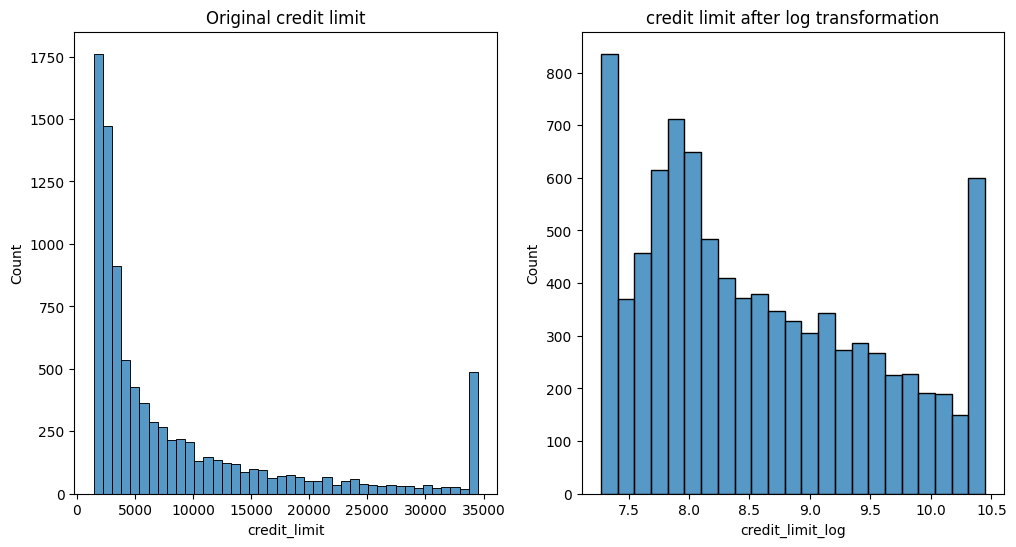

In [26]:
# use histogram to check the distribution of credit_limit
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(x='credit_limit', data=data, ax=axis[0])
axis[0].set_title('Original credit limit')
sns.histplot(x='credit_limit_log', data=data, ax=axis[1])
axis[1].set_title('credit limit after log transformation')
plt.show()

**5. Feature engineering** (est. 15 minutes, 30 pts)

Feature engineering refers to creating new features (columns) through data exploratory, in order to improve the performance of the model. It is a very important part of machine learning. A good feature engineering can often greatly improve the performance of a model. <br>

This includes creating new features (columns), which may be transformations or combinations of existing features. For example, extracting the year and month from a date column, or creating a new ratio feature from two existing numeric columns. <br>

1. Add  *avg_trans_amt* (average transaction amount) column (training question) or add the *usage_ratio*(competition question, use the two features of *total_trans_amt* and *credit_limit* to create a new feature called *usage_ratio*, this feature can represent the user's credit card usage, or the user's dependence on the bank, which may be helpful for our churn prediction model.) 15 pts <br>

2. Add *income_bins* column: In feature engineering, we often create new features by transforming or combining existing features. In this example, we create a new categorical feature by segmenting *income*. Training questions - 15 pts <br>

In [27]:
# create a new column: avg_trans_amt = total_trans_amt / total_trans_ct
data['avg_trans_amt'] = data['total_trans_amt'] / data['total_trans_ct']

In [28]:
# create a new colum: usage_ratio = total_trans_amt / credit_limit
data['usage_ratio'] = data['total_trans_amt'] / data['credit_limit']

In [29]:
# display the data after preprocessing
print("Data after preprocessing has {} rows and {} columns".format(data.shape[0], data.shape[1]))
data.head() # check the first 5 rows of the data after preprocessing

Data after preprocessing has 9015 rows and 21 columns


,ID,age,gender,dependent_count,education_level,marital_status,income,churn,card_category,months_on_book,...,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_trans_amt,total_trans_ct,avg_utilization_ratio,credit_limit_log,avg_trans_amt,usage_ratio
0,768805383,45.0,Male,3,High School,Married,$60K - $80K,0,Regular,39,...,3,12691.0,777,11914.0,1144,42,0.061,9.448648,27.238095,0.090143
1,818770008,49.0,Female,5,Graduate,Single,Less than $40K,0,Regular,44,...,2,8256.0,864,7392.0,1291,33,0.105,9.018695,39.121212,0.156371
2,713982108,51.0,Male,3,Graduate,Married,$80K - $120K,0,Regular,36,...,0,3418.0,0,3418.0,1887,20,0.000,8.136811,94.350000,0.552077
3,769911858,40.0,Female,4,High School,Unknown,Less than $40K,0,Regular,34,...,1,3313.0,2517,796.0,1171,20,0.760,8.105609,58.550000,0.353456
4,709106358,40.0,Male,3,Uneducated,Married,$60K - $80K,0,Regular,21,...,0,4716.0,0,4716.0,816,28,0.000,8.458716,29.142857,0.173028


## Part III, Exploratory Data Analysis and Data visualization (est. 35 minutes, 70 points)

At the part III, we will use various statistical and graphical methods to explore the dataset, and try to find potential correlations, hidden patterns, etc.

In this process, we may use data visualization tools, such as bar charts, histograms, box plots, scatter plots, etc. Those plots aim to help us better understand possible patterns, trends, and outliers of the data.

In Python, we usually use `Matplotlib` and `Seaborn` packages for data visualization. The `Pandas` packages also provides some plotting functions, which are built on top of Matplotlib but provide a simpler interface.

**1. Customer churn analysis** (est. 10 minutes, 20 pts)

In this part, we will analyze our target variable: *churn*. We want to find out which users are likely to churn, and what characteristics they share common. <br>

Task: <br>
Calculate and report the customer churn rate, which is the number of churned customers as a percentage of the total number of customers.
Draw a pie chart of customer churn rate, which will visually show the proportion of customers who churned and those who didn't. <br>

Competition questions, 20 pts.

Tips for churn rate:

Assuming we have 1000 customers in our dataset with 150 churned customers, the churn rate is calculated as below: <br>
churn rate = number of churned customers  / total number of customers <br>
churn rate = 150 /1000 <br>
churn rate = 0.15

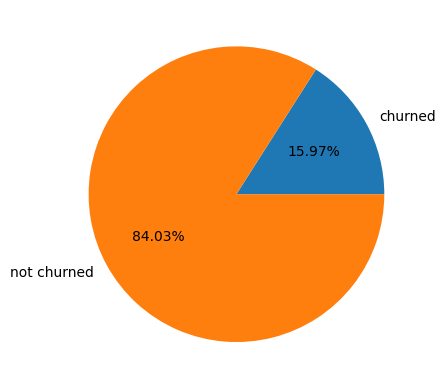

In [30]:
# calculate the number of churned and not churned customers
churned = data[data["churn"] == 1].shape[0]
not_churned = data[data["churn"] == 0].shape[0]

# save the number of churned and not churned customers as a list named 'customers_counts'
customers_counts = [churned, not_churned]

# labels
labels = ['churned', 'not churned']

# plot a pie chart
plt.pie(customers_counts, labels = labels, autopct='%1.2f%%')

# show the pie chart
plt.show()

**2.customer features analysis** (est. 10 minutes, 20 pts)

Training questions (suggesting 2 questions with 5 minutes each, 10 pts.)

In this part, we take column *age* as an example. Suppose the dataset contains customers from age 18 to 70. We want to see the number of churned customers in different age groups. First, we can calculate the number of churned customers for each age group, and then draw a histogram to show the results:

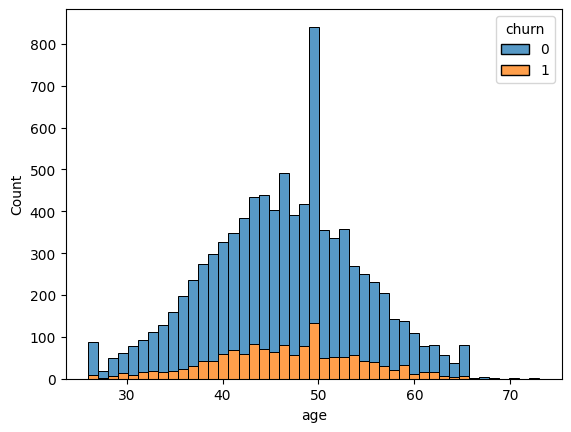

In [31]:
# use seaborn's histplot function to plot the histogram of age
sns.histplot(data=data, x="age", hue="churn", multiple="stack")

# 显示图形
plt.show()

This histogram shows the number of churned customers across ages. It helps us better understand the age effect on churned customers.

**3.Correlation analysis** (est. 15 minutes, 30 pts)

In this part, we will explore the relationship between each features (columns). We will calculate and visualize the correlations.

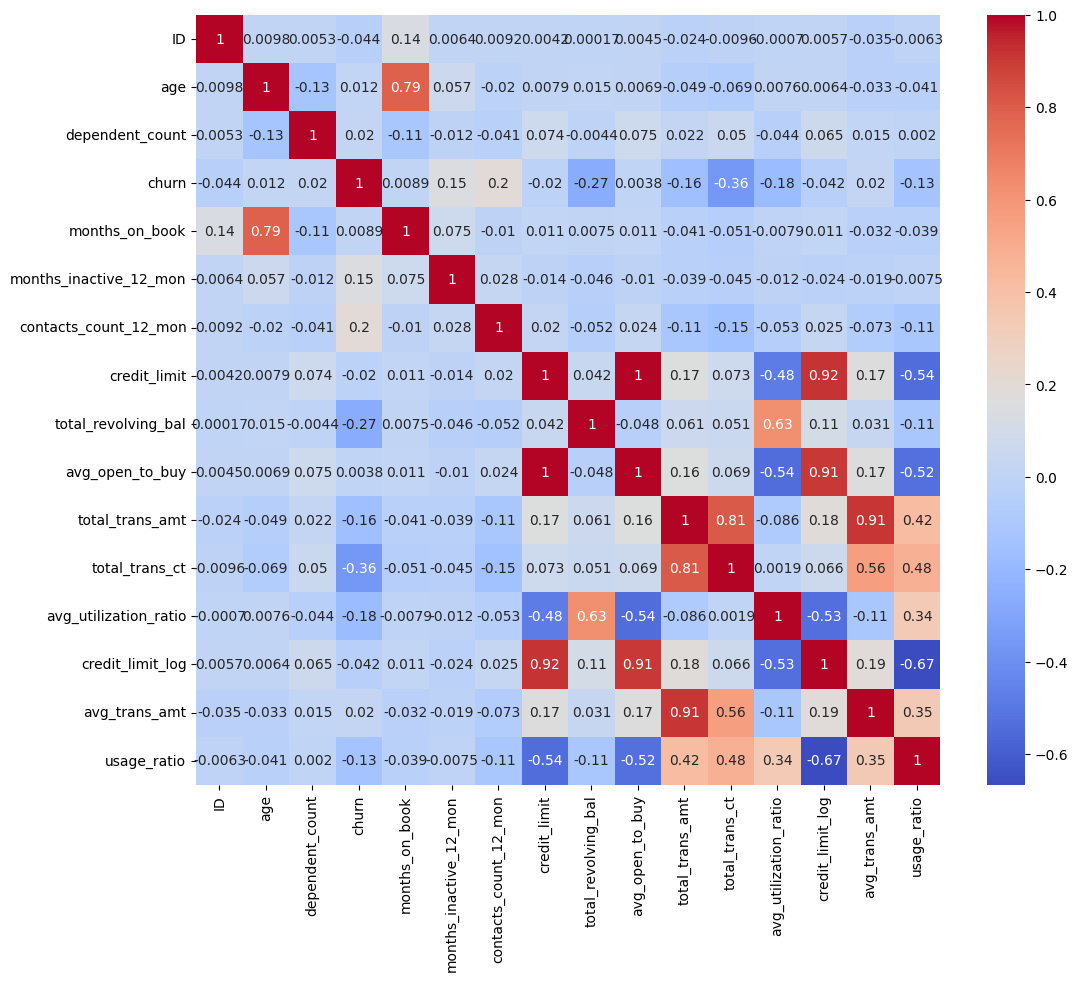

In [32]:
# set the figure size
plt.figure(figsize=(12, 10))

# select numerical data
numerical_data = data.select_dtypes(include=[np.number])

# calculate the correlation matrix
corr_matrix = numerical_data.corr()

# plot heatmape of the correlation matrix using seaborn's heatmap function
sns.heatmap(corr_matrix, annot=True,cmap="coolwarm")

# show the plot
plt.show()

## Part IV, data engineering and analysis (est. 55 minutes, 130 pts)

In this part, we will dive into the data and try to get a deep understanding on the potential causes of churned customers. 

**1. Define target, categorical, and continous features** (est. 3 minutes, 5 pts)

In [33]:
# target feature
target = ['churn']
# categorical features
category_features = [
    'gender', 'education_level', 'marital_status', 'income','card_category'
]
# continuous features
continous_features = [
    'age', 'dependent_count', 'months_on_book', 'months_inactive_12_mon', 'contacts_count_12_mon',
    'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_trans_amt', 'total_trans_ct', 
    'avg_utilization_ratio', 'credit_limit_log', 'avg_trans_amt', 'usage_ratio' ]

The classification above helps us better understand the data and conduct data analysis in a clear manner. We can now analyze categorical and continous features separately. <br>

For categorical features, we can look at the number of categories for each feature, and the distribution of the number of samples for each category. In addition, we can also check the percentage of customer churn under each category. This helps us find key categories that may affect customer churn. <br>

For continuous features, we can view the basic statistics of the feature, such as mean, median, minimum, maximum, etc. In addition, we can also draw histograms to observe the distribution of features, and check if there is a significant difference in the distribution of the feature between the churned and non-churned samples. <br>

Next, we can start the analyze process.

**2. check categorical features vs. churn** （est. 2 minutes, 5 pts）

In [34]:
# Through cross table, check the "churn" feature in "education level"
cross_table = pd.crosstab(data["education_level"], data["churn"])
print(cross_table)

churn               0    1
education_level           
Doctorate         683  167
Graduate         2358  438
High School      1525  263
Undergrad         767  138
Uneducated       1097  205
Unknown          1145  229


**3. Through a custom function, draw barplots of "churn vs. all category features"**  (est. 10 minutes, 25 pts)

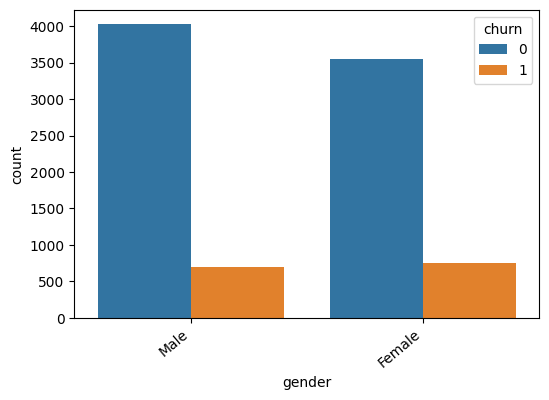

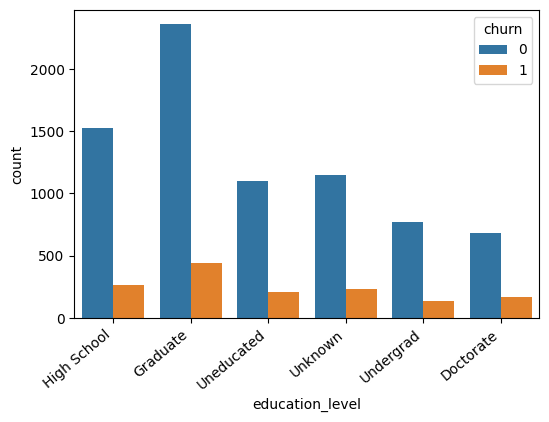

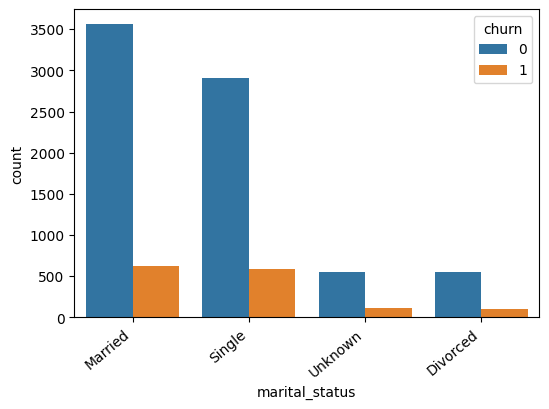

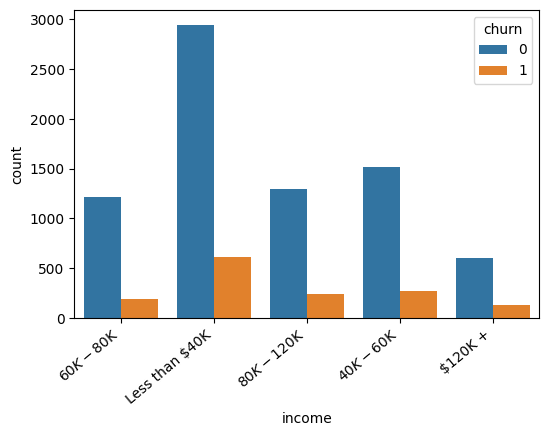

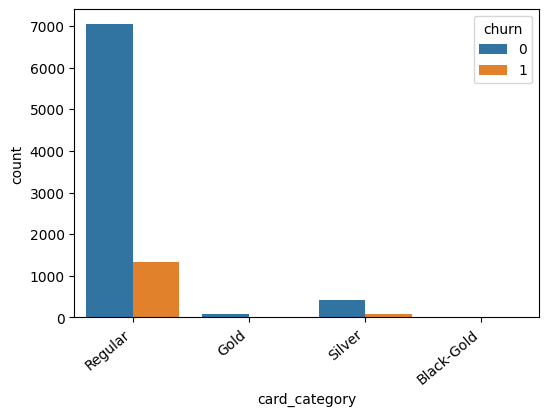

In [35]:
# define a function to plot the countplot of each category feature
def plot_feature(feature):
    plt.figure(figsize=(6, 4)) # create a new figure
    sns.countplot(x=feature, hue='churn', data=data) # plot the barplot using seaborn's countplot function
    plt.xticks(rotation=40, ha="right") # rotate the xticks for better display
    plt.show() # show the plot

# plot the countplot of each category feature using plot_feature function for each category feature
for feature in category_features:
    plot_feature(feature)

**4. Through a custom function, draw a boxplots of "churn vs. all continous features"**  (est. 10 minutes, 25 pts)

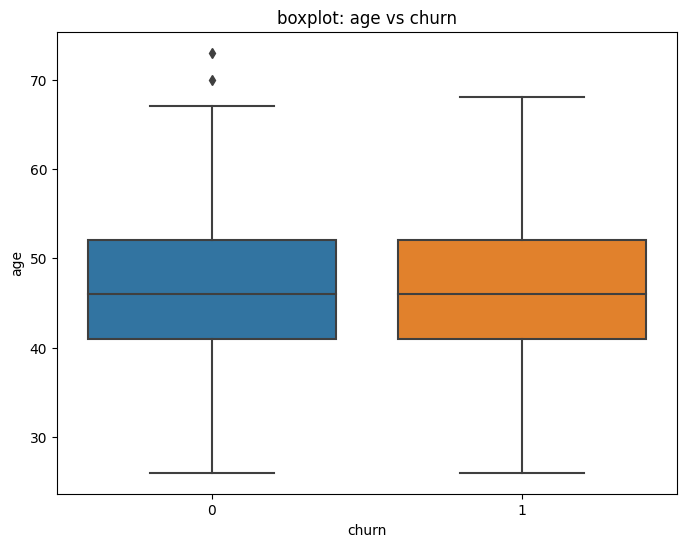

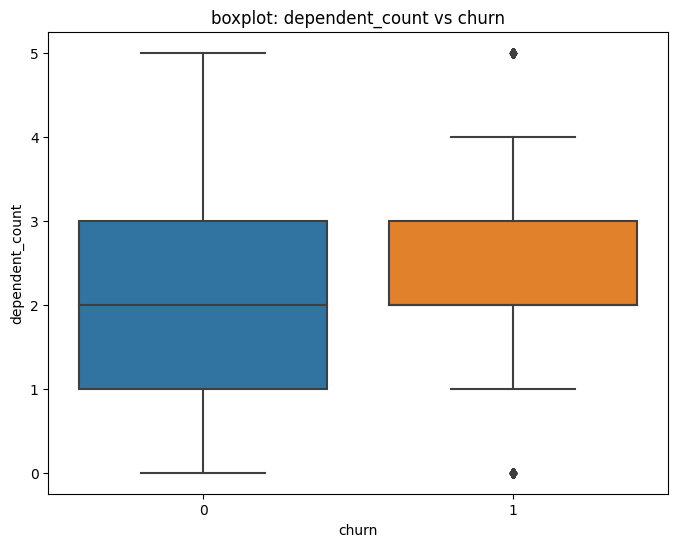

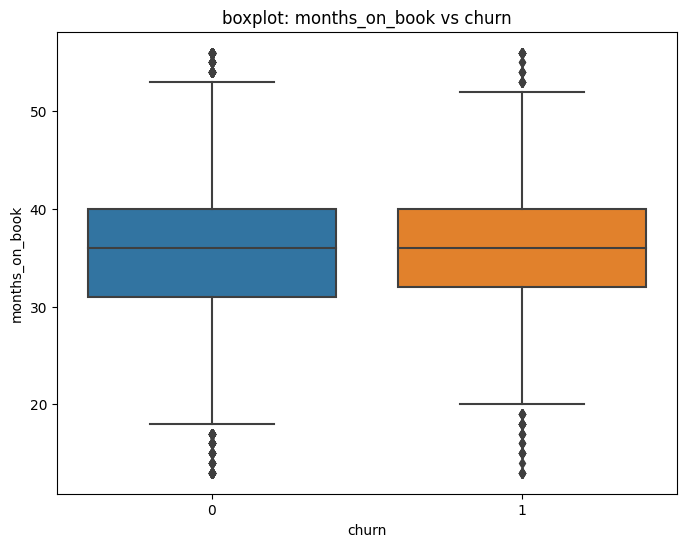

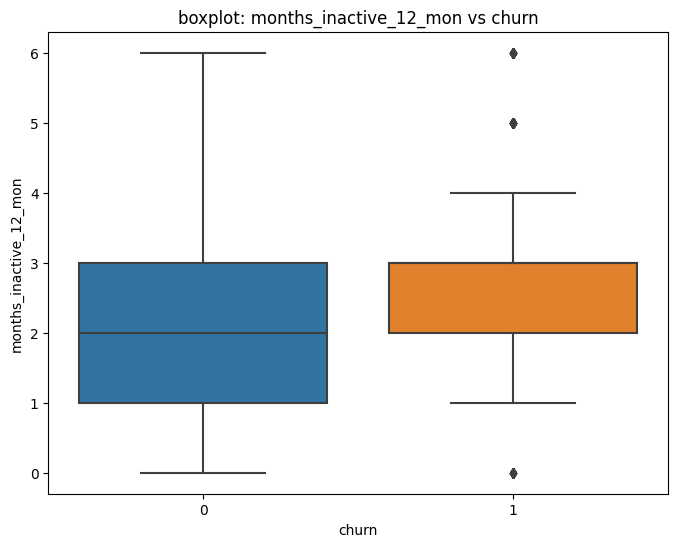

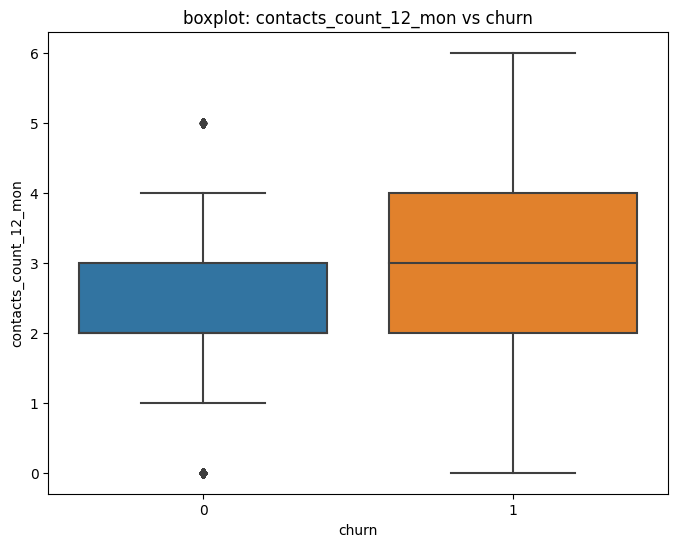

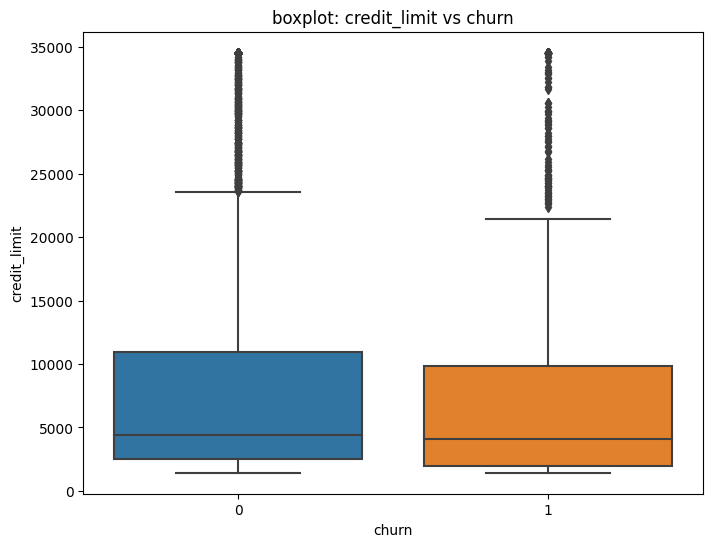

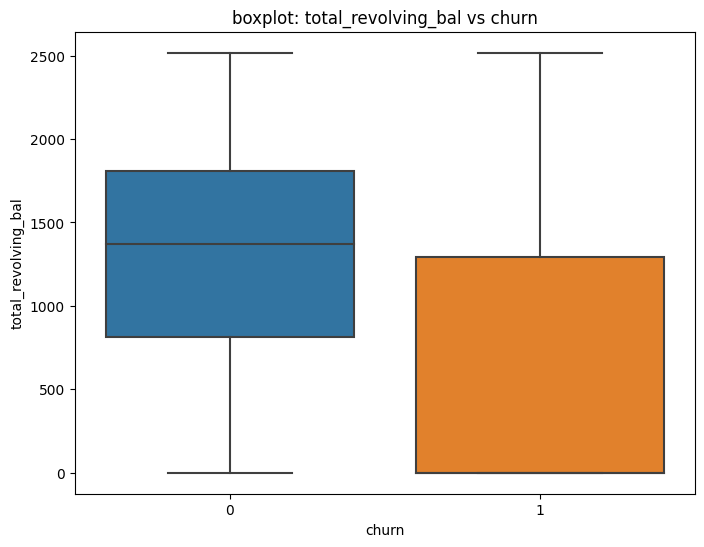

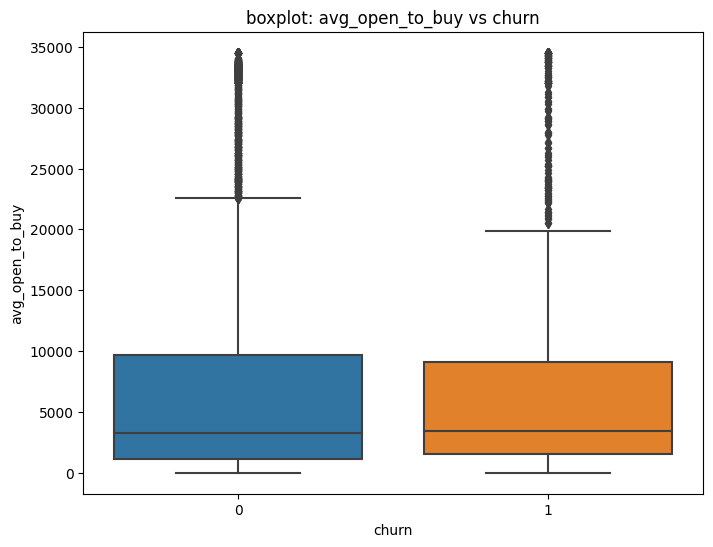

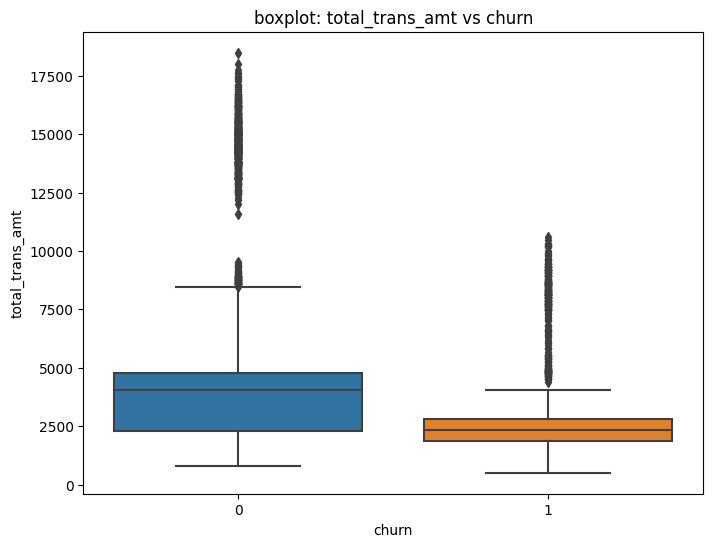

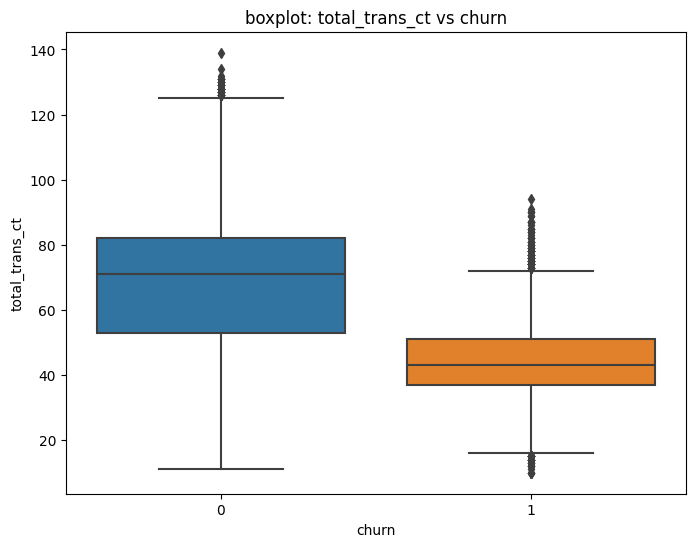

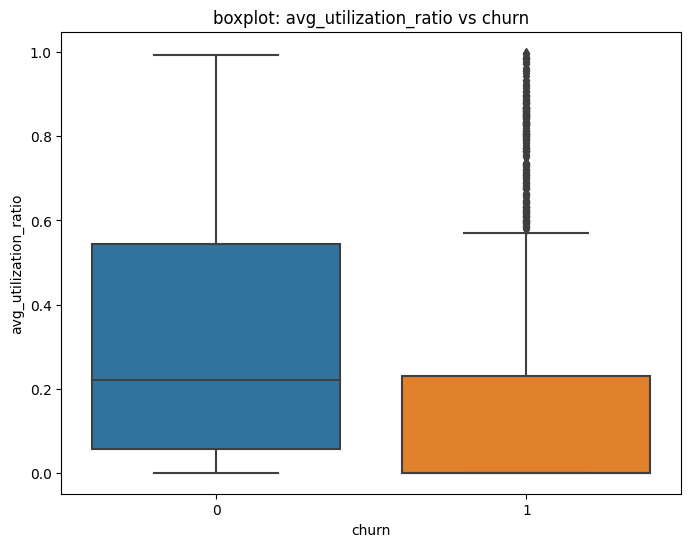

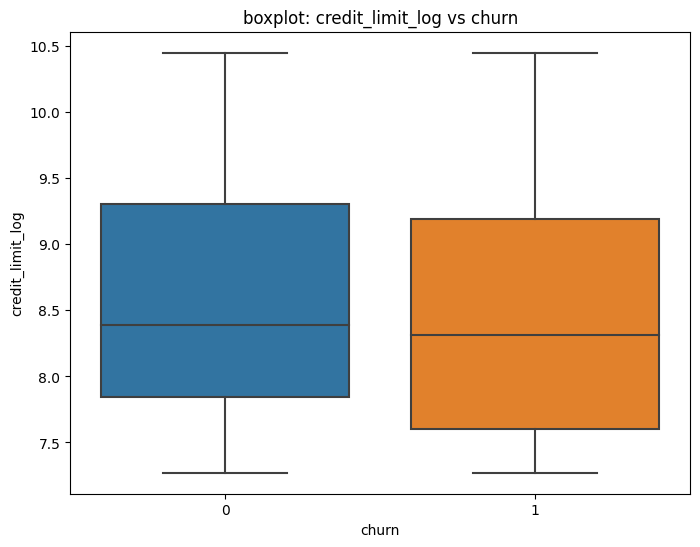

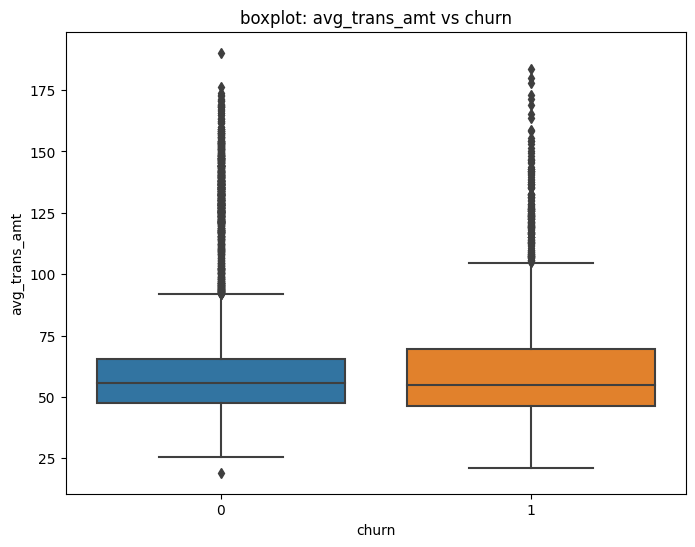

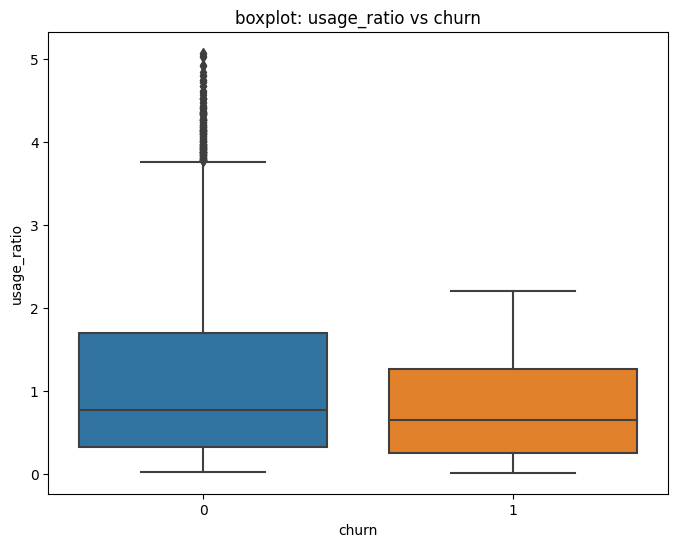

In [36]:
def draw_boxplot(data, features, target):
    for feature in features:
        plt.figure(figsize=(8,6))
        sns.boxplot(x=target, y=feature, data=data)
        plt.title(f'boxplot: {feature} vs {target}')
        plt.show()

# plot the boxplot of each continuous feature using draw_boxplot function for each continuous feature
draw_boxplot(data, continous_features, 'churn')

**5. Draw a scatter plot of the three-variable analysis** (est. 15 minutes, 30 pts)

In the boxplot analysis of step 4, we found that both *total_trans_amt* and *total_trans_ct* potentially have an impact on *churn*. Next, we will perform a three-variable analysis using *total_trans_amt*, *total_trans_ct*, and *churn*. <br>

We will draw a scatter plot of the three-variable analysis, in which each point represents a customer, the position of the point reflects the user's 'total_trans_amt' and 'total_trans_ct', and the color of the point indicates whether the user is churned. With this graph, you can observe the relationship between the two variables and how they relate to churn.

<AxesSubplot: xlabel='total_trans_amt', ylabel='total_trans_ct'>

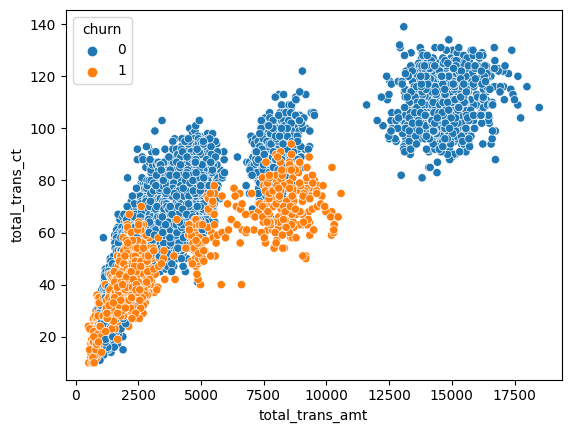

In [37]:
sns.scatterplot(x='total_trans_amt', y='total_trans_ct', hue='churn', data=data)

In [38]:
# Create a flag for churned customers based on the above scatter plot
flag = (data['total_trans_amt'] > 2000) & (data['total_trans_ct'] < 50)
result = data['churn'][flag].value_counts()
print (result)
print(result / result.sum())

1    602
0    266
Name: churn, dtype: int64
1    0.693548
0    0.306452
Name: churn, dtype: float64


In [39]:
# print out the findings
print(
    "The Flag contains {} customers, which is about {:.2f}% of total customers. \nIt also contains {} churned customers, which is about {:.2f}% of total churned customers".format(
        sum(flag), 
        sum(flag) / len(data) * 100, 
        result[1], 
        result[1] / data['churn'].value_counts()[1] * 100
    )
)

The Flag contains 868 customers, which is about 9.63% of total customers. 
It also contains 602 churned customers, which is about 41.81% of total churned customers


**6. Decision tree** （est. 15 minutes, 40 pts）

We will train a decision tree model to make prediction. *total_trans_amt* and *total_trans_ct* are used to predict *churn*. 

In [40]:
from sklearn import tree
target = ['churn']
features = ['total_trans_amt', 'total_trans_ct'] # use total_trans_amt and total_trans_ct to predict churn. 
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 63) # create a decision tree。max_depth = 3 is assigned to prevent overfitting. random_state = 63 is assigned to fix randomization.
clf.fit(data[features], data[target]) # use clf.fit() to train the model. data[features] and data[target] are inputed as parameters.

DecisionTreeClassifier(max_depth=3, random_state=63)

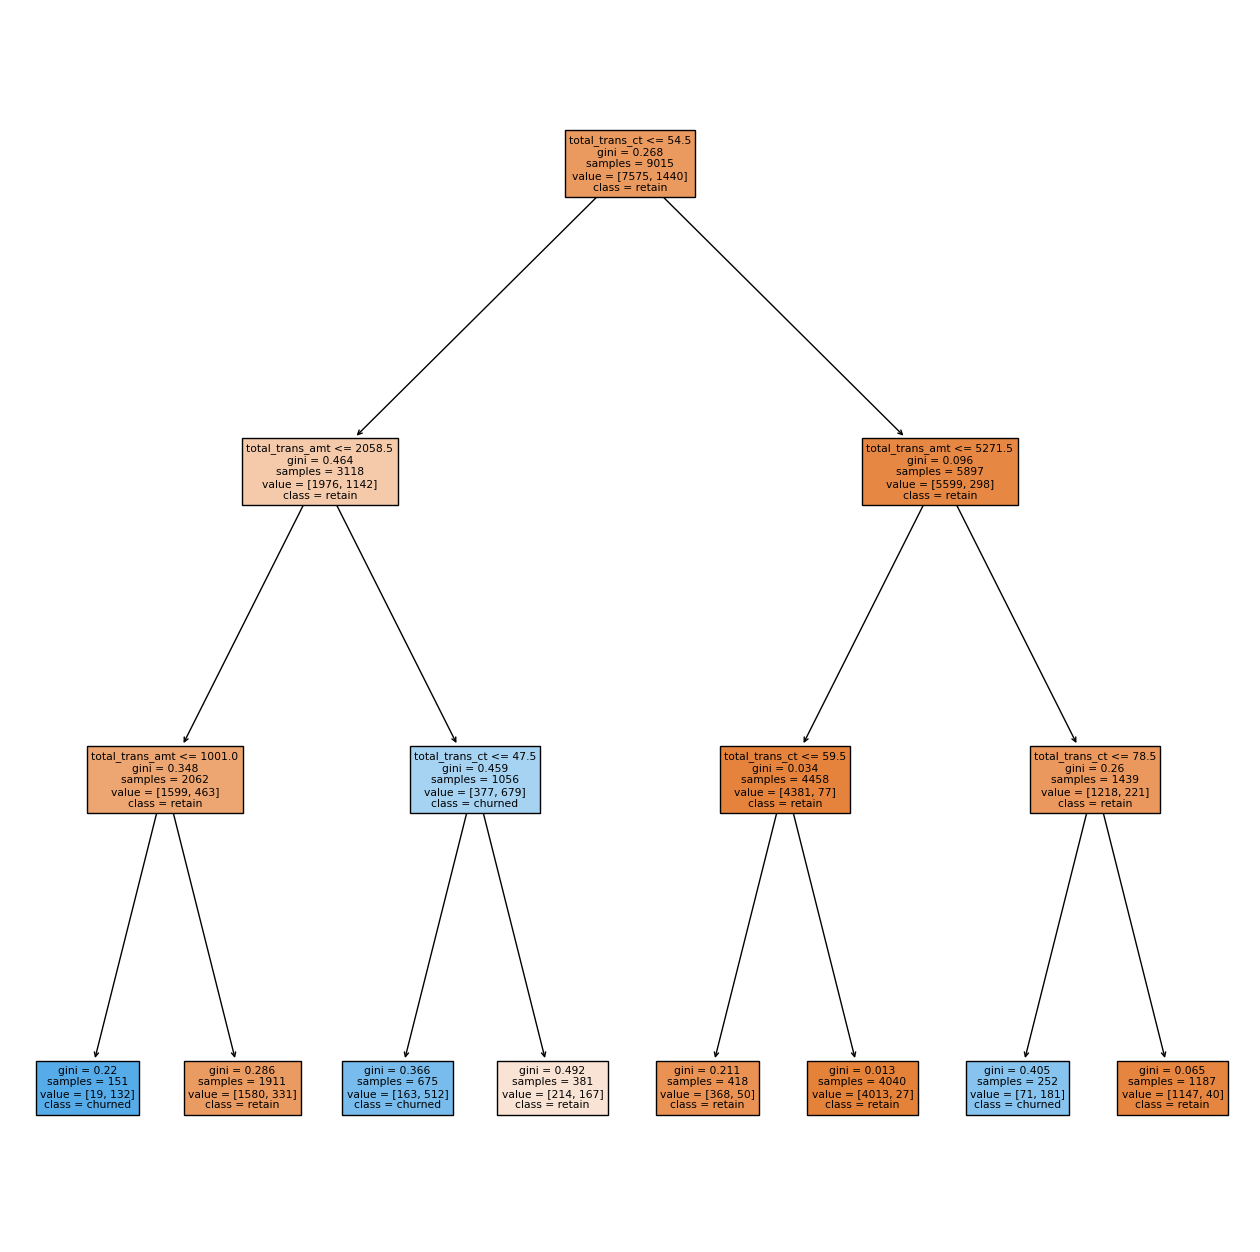

In [41]:
plt.figure(figsize=(16, 16))
tree_graph = tree.plot_tree(clf, filled=True, feature_names=features, class_names=["retain", "churned"])

**Notes:**

tree.plot_tree(clf, filled=True, feature_names=features, class_names=["retain", "churned"]): This line of code uses the tree.plot_tree() function to visualize the decision tree model. clf is our trained decision tree model. The parameter filled=True means that the nodes of the tree are colored to distinguish different categories. The parameter feature_names=features specifies the names of the features, which displays in the nodes of the tree. The parameter class_names=["retention", "churn"] specifies the names of the categories, which displays at the leaf nodes to indicate the corresponding categories. <br>

In this way, you can visualize a graphical decision tree model, each node is marked with the corresponding feature, division threshold, number of samples, category distribution and final category judgment. Through this graph, you can clearly see how the decision tree is divided according to nodes of different features, and the category distribution of samples after each branch.

**Analysis report**

According to the results of the decision tree, we can propose intervention plans to the business department. The business department will choose the corresponding strategy based on the business needs and the reports we provide. Taking the above decision tree as an example, we can propose corresponding plans from two directions: high accuracy or high coverage. <br>

Intervention plans: Percentage of total customers; Percentage of churned customers <br>
Option 1. Segmentation of *total_trans_ct*<=47.5 and *total_trans_amt*<=2058.5 accounts for 6.82% of total customers and 35.55% of churned customers. Under this segmentation, 75% of customers are churned, and the number of churn customers under this condition is also significant. <br>
Option 2. Segmentation of *total_trans_ct*<=54.5 and *total_trans_amt*<=2058.5 accounts for 21.92% of total customers and 79.3% of churned customers. Under this segmentation, it covers 80% of the total churned customers, through an acceptable 20% of total customer coverage. <br>

After the business department receives the report, if the business department wants to intervene with high-risk customers at a low cost, it can choose option 1. Option 1 has an accuracy as high as 75%, and, the size of the total customers involved is only 7%; If the business department wants the intervention plan to cover as many customers as possible, it will choose option 2, because it covers 80% of the churned customers, and the scale involved only accounts for about 20% of the whole. <br>

In reality, the business department also relies on other indicators to make decision, such as credit card grade, length of card opening, and single payment.